In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import k_means

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wildblueberrydatasetpollinationsimulation/WildBlueberryPollinationSimulationData.csv


In [2]:
df = pd.read_csv("/kaggle/input/wildblueberrydatasetpollinationsimulation/WildBlueberryPollinationSimulationData.csv", index_col='Row#')
df.head()

clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
Row#                                                                   
0          37.5      0.75     0.25     0.25   0.25              86.0   
1          37.5      0.75     0.25     0.25   0.25              86.0   
2          37.5      0.75     0.25     0.25   0.25              94.6   
3          37.5      0.75     0.25     0.25   0.25              94.6   
4          37.5      0.75     0.25     0.25   0.25              86.0   

      MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  \
Row#                                                             
0                 52.0                  71.9              62.0   
1                 52.0                  71.9              62.0   
2                 57.2                  79.0              68.2   
3                 57.2                  79.0              68.2   
4                 52.0                  71.9              62.0   

      MinOfLowerTRange  AverageOfLowerTRange  RainingDays  AverageRainingDays  \
Row#                                                                            
0                 30.0                  50.8         16.0                0.26   
1                 30.0                  50.8          1.0                0.10   
2                 33.0                  55.9         16.0                0.26   
3                 33.0                  55.9          1.0                0.10   
4                 30.0                  50.8         24.0                0.39   

      fruitset  fruitmass      seeds        yield  
Row#                                               
0     0.410652   0.408159  31.678898  3813.165795  
1     0.444254   0.425458  33.449385  4947.605663  
2     0.383787   0.399172  30.546306  3866.798965  
3     0.407564   0.408789  31.562586  4303.943030  
4     0.354413   0.382703  28.873714  3436.493543

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [4]:
df.describe()

clonesize    honeybee     bumbles     andrena       osmia  \
count  777.000000  777.000000  777.000000  777.000000  777.000000   
mean    18.767696    0.417133    0.282389    0.468817    0.562062   
std      6.999063    0.978904    0.066343    0.161052    0.169119   
min     10.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.500000    0.250000    0.250000    0.380000    0.500000   
50%     12.500000    0.250000    0.250000    0.500000    0.630000   
75%     25.000000    0.500000    0.380000    0.630000    0.750000   
max     40.000000   18.430000    0.585000    0.750000    0.750000   

       MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count        777.000000        777.000000            777.000000   
mean          82.277091         49.700515             68.723037   
std            9.193745          5.595769              7.676984   
min           69.700000         39.000000             58.200000   
25%           77.400000         46.800000             64.700000   
50%           86.000000         52.000000             71.900000   
75%           89.000000         52.000000             71.900000   
max           94.600000         57.200000             79.000000   

       MaxOfLowerTRange  MinOfLowerTRange  AverageOfLowerTRange  RainingDays  \
count        777.000000        777.000000            777.000000   777.000000   
mean          59.309395         28.690219             48.613127    18.309292   
std            6.647760          3.209547              5.417072    12.124226   
min           50.200000         24.300000             41.200000     1.000000   
25%           55.800000         27.000000             45.800000     3.770000   
50%           62.000000         30.000000             50.800000    16.000000   
75%           66.000000         30.000000             50.800000    24.000000   
max           68.200000         33.000000             55.900000    34.000000   

       AverageRainingDays    fruitset   fruitmass       seeds        yield  
count          777.000000  777.000000  777.000000  777.000000   777.000000  
mean             0.320000    0.502121    0.445983   36.122432  6012.849165  
std              0.171279    0.079445    0.040333    4.377889  1356.955318  
min              0.060000    0.192732    0.311921   22.079199  1637.704022  
25%              0.100000    0.454725    0.416281   33.116091  5124.854901  
50%              0.260000    0.508297    0.445587   36.166044  6107.382466  
75%              0.390000    0.561297    0.476149   39.239668  7022.189731  
max              0.560000    0.652144    0.535660   46.585105  8969.401842

In [5]:
features_df = df.drop('yield', axis=1)
tar = df['yield']

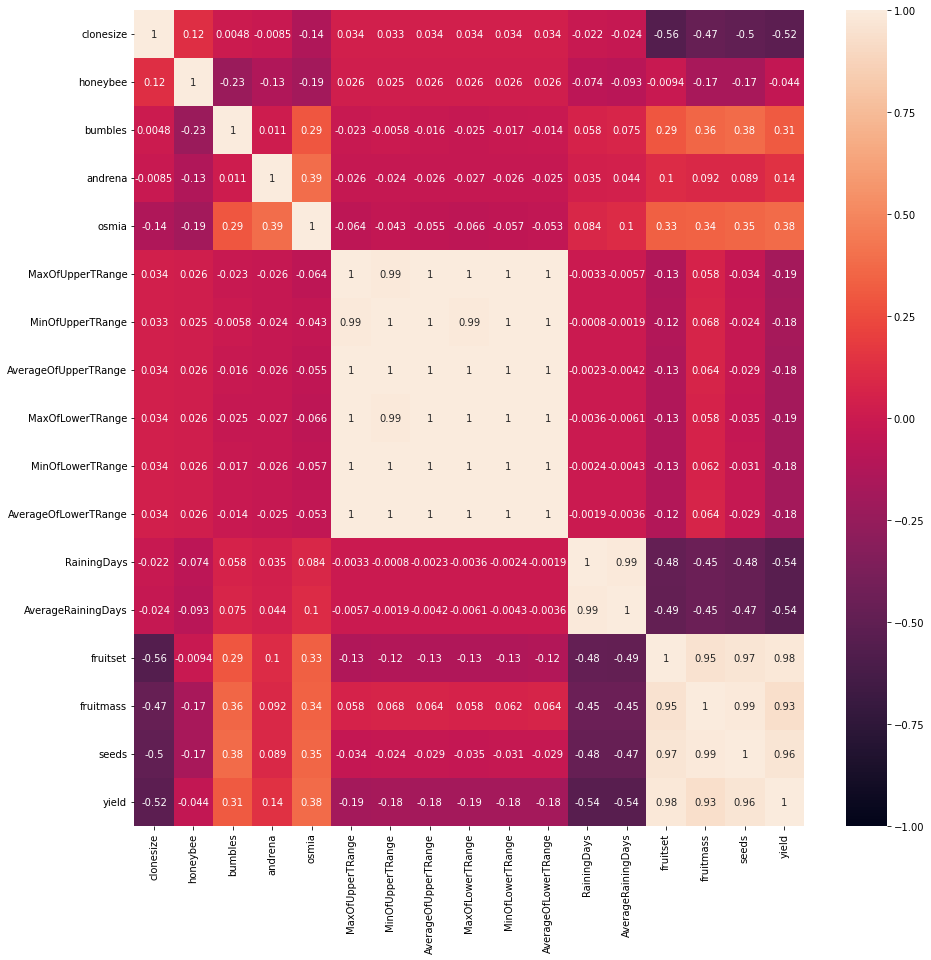

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

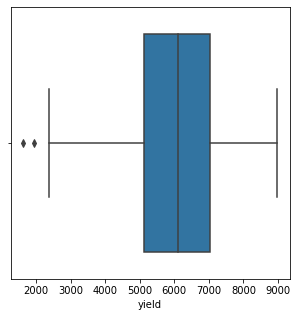

In [7]:
plt.figure(figsize=(5,5))
sns.boxplot(x='yield', data=df)
plt.show()

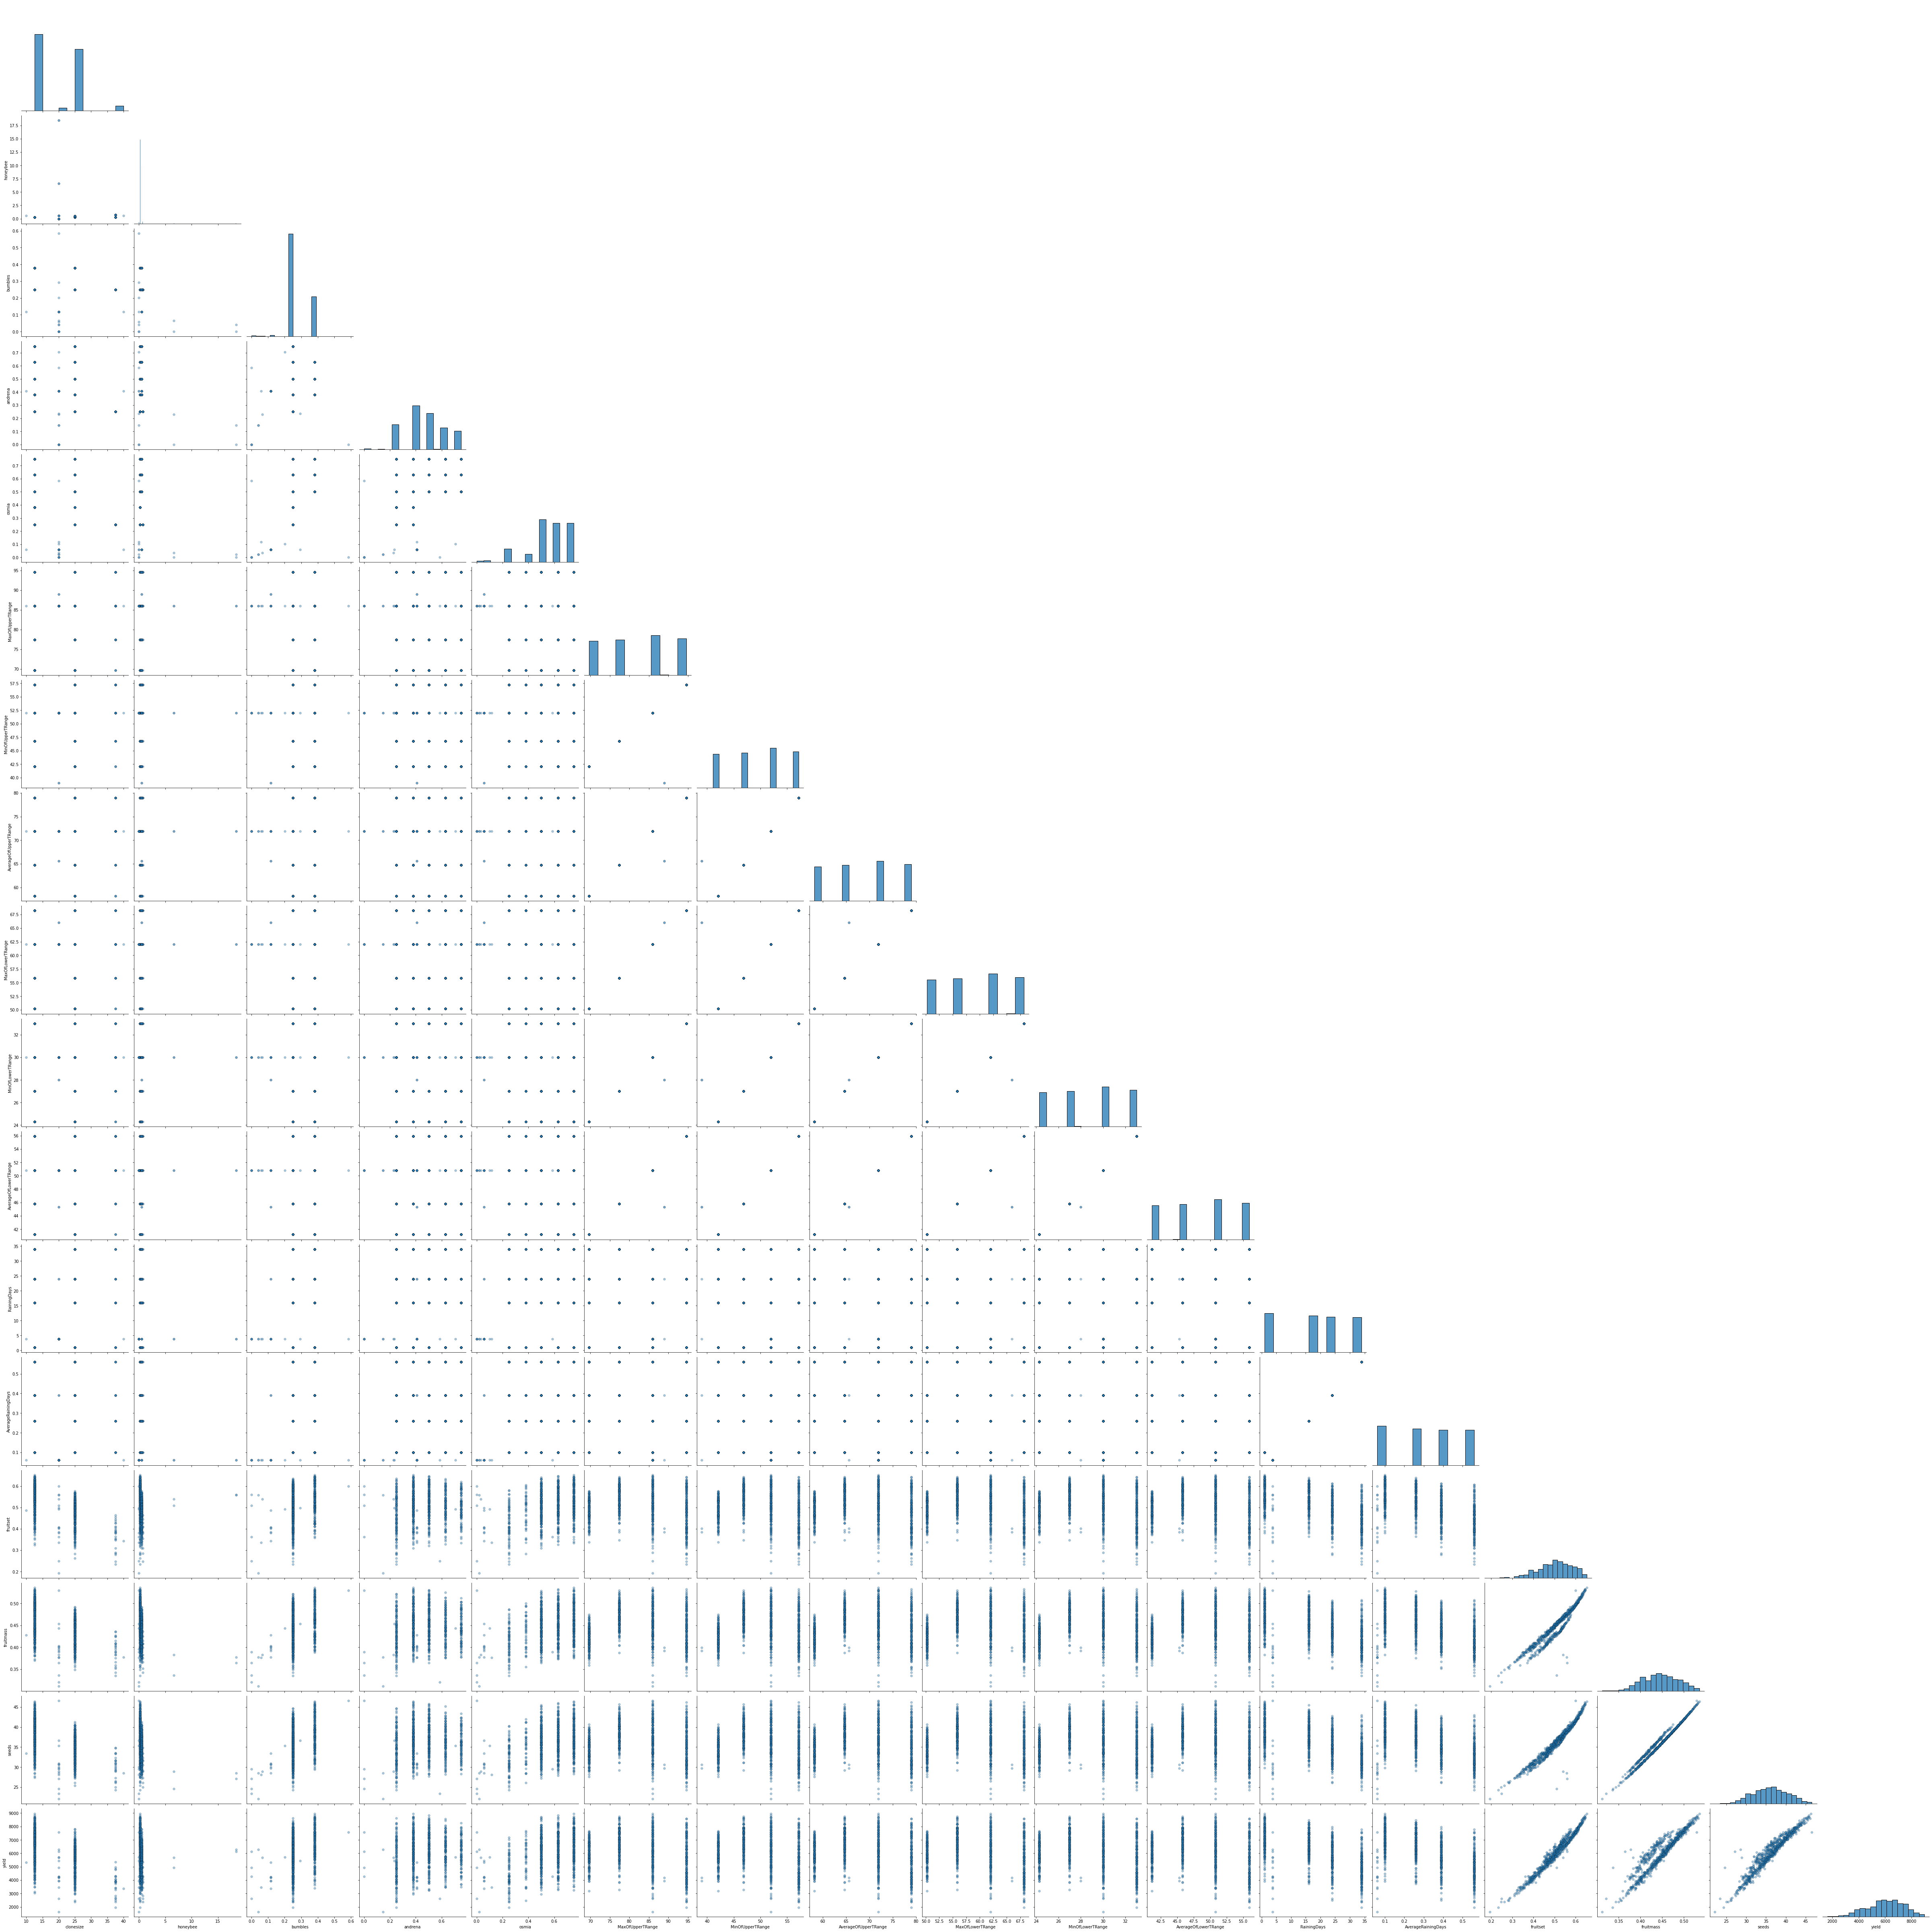

In [8]:
sns.pairplot(df, 
            height=4,
            plot_kws = {'alpha': 0.4, 's': 30, 'edgecolor': 'k'},
            corner=True
           );

In [9]:
df.nunique()

clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

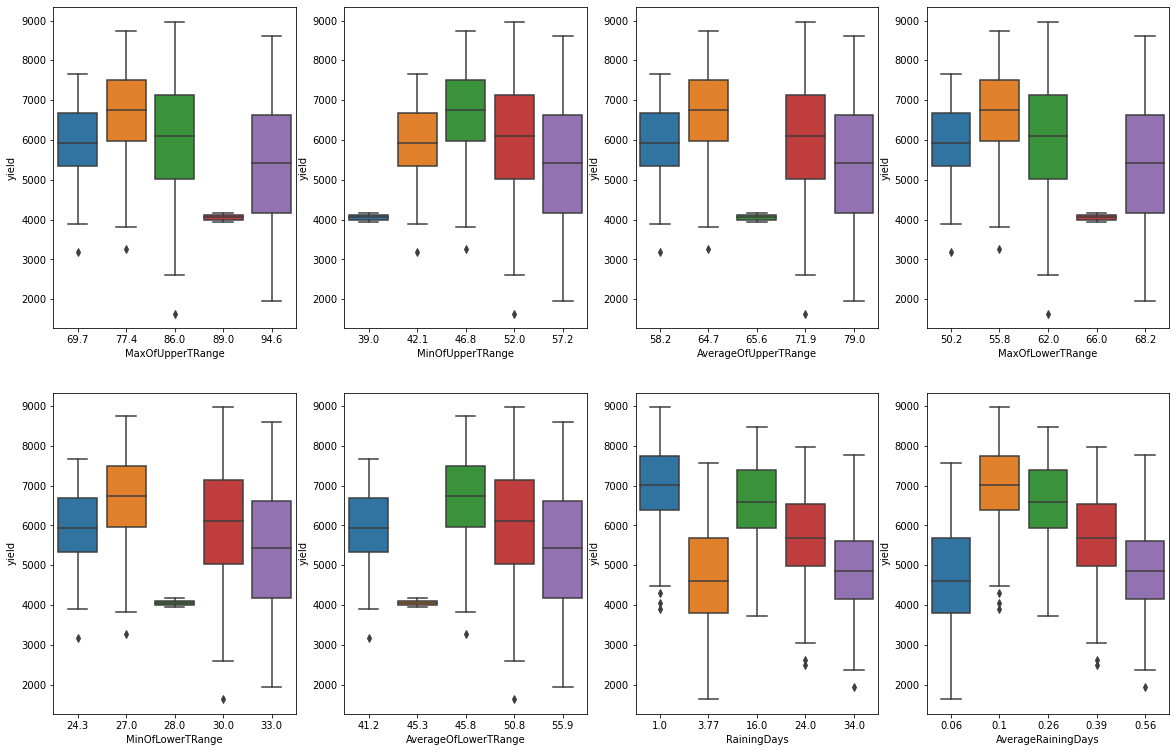

In [10]:
nominal_df = df[['MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange',
               'MinOfLowerTRange','AverageOfLowerTRange','RainingDays','AverageRainingDays']]

fig, ax = plt.subplots(2,4, figsize=(20,13))
for e, col in enumerate(nominal_df.columns):
    if e<=3:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[0,e])
    else:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[1,e-4])       
plt.show()

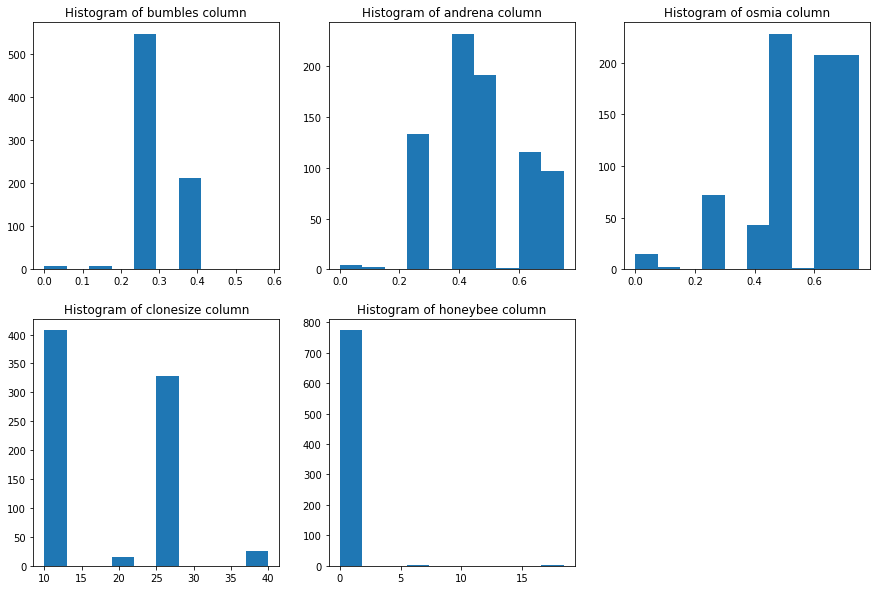

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df['bumbles'])
plt.title("Histogram of bumbles column")
plt.subplot(2,3,2)
plt.hist(df['andrena'])
plt.title("Histogram of andrena column")
plt.subplot(2,3,3)
plt.hist(df['osmia'])
plt.title("Histogram of osmia column")
plt.subplot(2,3,4)
plt.hist(df['clonesize'])
plt.title("Histogram of clonesize column")
plt.subplot(2,3,5)
plt.hist(df['honeybee'])
plt.title("Histogram of honeybee column")
plt.show()

## Observations:

- Upper and lower T range columns correlate with each other
- Rainy days and average rainy days correlates with each other
- Fruitmass, fruitset and seeds are correlated
- 'bumbles' column is highly imbalance while 'andrena' and 'osmia' columns are not
- 'honeybee' is also imbalanced column compared to 'clonesize'

In [12]:
# run the MI scores of the dataset
mi_score = mutual_info_regression(features_df, tar, n_neighbors=3,random_state=42)
mi_score_df = pd.DataFrame({'columns':features_df.columns, 'MI_score':mi_score})
mi_score_df.sort_values(by='MI_score', ascending=False)

columns  MI_score
13              fruitset  1.948853
15                 seeds  1.664007
14             fruitmass  1.588506
12    AverageRainingDays  0.217232
11           RainingDays  0.215965
0              clonesize  0.182163
5       MaxOfUpperTRange  0.125941
6       MinOfUpperTRange  0.125599
8       MaxOfLowerTRange  0.124477
10  AverageOfLowerTRange  0.123369
7   AverageOfUpperTRange  0.123133
9       MinOfLowerTRange  0.121836
1               honeybee  0.107665
4                  osmia  0.090037
2                bumbles  0.051319
3                andrena  0.045178

- We can see TOP features with high correlation with target variable, we can keep most significant features and remove less significant features for modeling task
- We will keep top 4 features + clonesize and averageoflower and upper T range features for modeling
- Cluster all 4 types of Bees to reduce features
- standardize the dataset and build baseline using GBT or HistGBT